# Numerical operation - Discretize and clip data

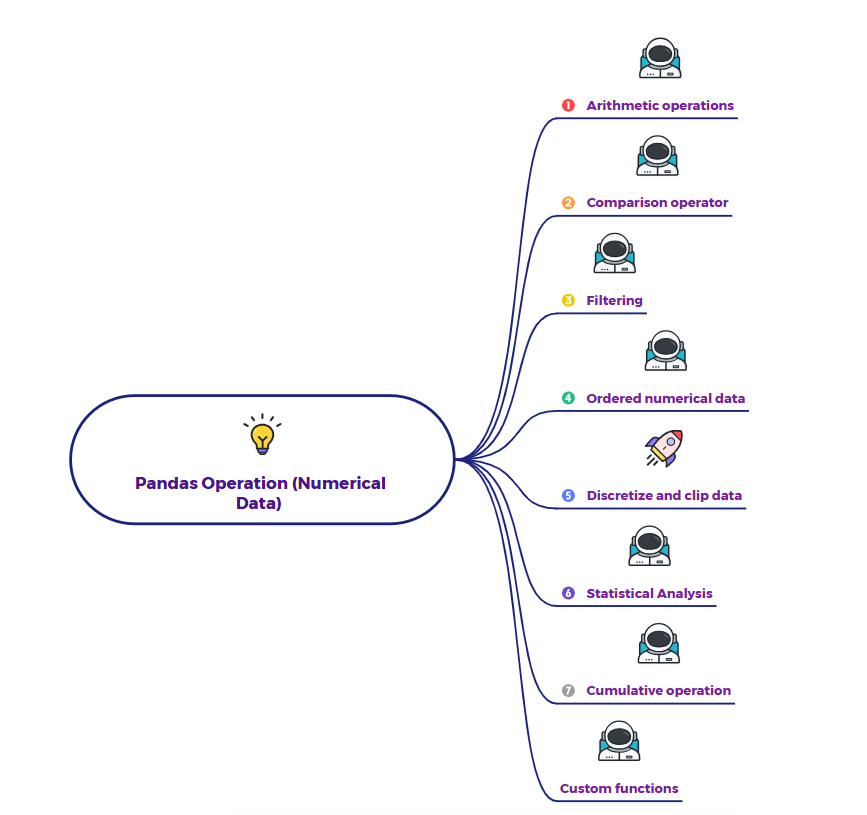

# Notebook Walkthrough -

* Discretize and Clip Data
* Import the required dataset and perform initial analysis
* Discretize Data - cut()
* Discretize data - qcut()
* Clipping data - clip()

# 1. Discretize and Clip Data

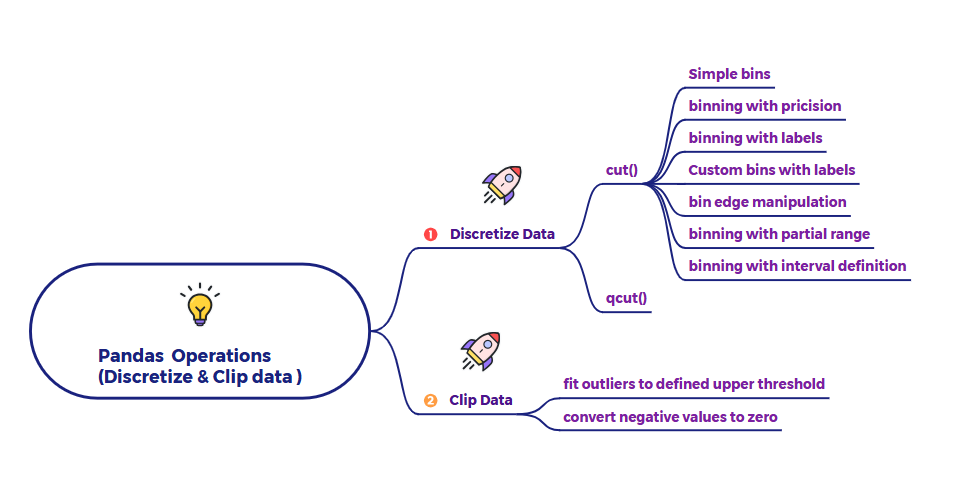

# 2. Import the required dataset and perform initial analysis

In [116]:
import pandas as pd
import numpy as np

movies = pd.read_csv('Movies.csv')
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [117]:
movies.shape

(3853, 28)

In [118]:
# View numerical columns of movies dataset

df1 = movies.select_dtypes(include='number')
df1.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


# 3. Discretize Data - cut()

Data discretization, also known as binning, is the process of converting continuous or numerical data into discrete, categorical, or ordinal bins (intervals). Instead of having an exact numerical value, data points are assigned to a specific range or category.

The primary purpose of binning is to simplify data by reducing the number of unique values, which can help in:

* Handling outliers: Extreme values might fall into the same bin as less extreme ones, reducing their individual impact.
* Improving model performance: Some algorithms work better with categorical data or discrete ranges rather than continuous numbers.
* Reducing noise: By grouping values, minor fluctuations or noise in the data can be smoothed out.
* Easier interpretation: It's often easier to understand data when grouped into meaningful categories (e.g., "Low," "Medium," "High") than precise numerical values.

Example:

Imagine you have a list of student exam scores, which are continuous numerical values:

Original Scores: 62,75,88,55,91,68,72,80,45,95

Now, let's apply a simple binning strategy to categorize these scores into grades. We'll define custom bins:

* Bin 1 (Fail): Scores below 60
* Bin 2 (Pass): Scores from 60 up to (but not including) 70
* Bin 3 (Good): Scores from 70 up to (but not including) 85
* Bin 4 (Excellent): Scores 85 and above

Applying this discretization:

* 62→ Pass
* 75→ Good
* 88→ Excellent
* 55→ Fail
* 91→ Excellent
* 68→ Pass
* 72→ Good
* 80→ Good
* 45→ Fail
* 95→ Excellent

Discretized Data (Grades): Fail, Pass, Good, Excellent, Pass, Good, Good, Fail, Excellent

Instead of 10 distinct numerical values, we now have 4 discrete categories. This makes it easier to, for instance, quickly count how many students are in each grade category, even if their exact numerical scores vary widely within that category.

Implementation :

* pd.cut(x, bins=N)

   * Simple bins: Discretizes x into N equally spaced bins.

* pd.cut(x, bins=N, precision=M)

   * Binning with precision: Discretizes x into N bins and formats the bin labels with M decimal places.

* pd.cut(x, bins=N, labels=False)

   * Binning with labels (numerical): Discretizes x into N bins and returns integer codes (bin indices) instead of interval labels.

* pd.cut(x, bins=N, labels=['label1', 'label2', ...])

   * Binning with labels (custom): Discretizes x into N bins and assigns custom string labels to each bin.

* pd.cut(x, bins=[b1, b2, ...], labels=['label1', 'label2', ...])

   * Custom bins with labels: Discretizes x using explicitly defined bin edges and assigns custom string labels to these custom bins.

* pd.cut(x, bins=[b1, b2, ...], right=False)

   * Bin edge manipulation: Discretizes x using custom bin edges, making the intervals left-inclusive [a, b).

* pd.cut(x, bins=[b1, b2, ...], include_lowest=True)

   * Binning with partial range: Discretizes x using custom bin edges, explicitly including the lowest value in the first bin.

* pd.cut(x, bins=pd.IntervalIndex.from_tuples([...]))

   * Binning with interval definition: Discretizes x using pre-defined IntervalIndex objects as bins, allowing for precise control over interval boundaries and properties.

### A. pd.cut(x, bins=N) - Simple bins(Discretizes x into N equally spaced bins.)

In [130]:
df1['imdb_score_simple_bin'] = pd.cut(df1['imdb_score'], 5)
df1[['imdb_score' , 'imdb_score_simple_bin']].head()

,imdb_score,imdb_score_simple_bin
0,7.9,"(7.76, 9.3]"
1,7.1,"(6.22, 7.76]"
2,6.8,"(6.22, 7.76]"
3,8.5,"(7.76, 9.3]"
4,6.6,"(6.22, 7.76]"


In [127]:
# df1.imdb_score.min() = 1.6
# df1.imdb_score.max() = 9.3
# bin width ((df1.imdb_score.max() - df1.imdb_score.min())/5) : 1.54
# bin values ((1.592, 3.14] , (3.14, 4.68] , (4.68, 6.22] , (6.22, 7.76] , (7.76, 9.3])

In [131]:
df1['imdb_score_simple_bin'].value_counts()

,count
imdb_score_simple_bin,
"(6.22, 7.76]",2044
"(4.68, 6.22]",1243
"(7.76, 9.3]",352
"(3.14, 4.68]",183
"(1.592, 3.14]",31


### B. pd.cut(x, bins=N, precision=M) - Binning with precision: Discretizes x into N bins and formats the bin labels with M decimal places.

In [133]:
df1 = movies.select_dtypes(include='number')
df1.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [145]:
print(pd.cut(df1['imdb_score'], 5, precision=0).value_counts())
print(pd.cut(df1['imdb_score'], 5, precision=1).value_counts())
print(pd.cut(df1['imdb_score'], 5, precision=2).value_counts())

imdb_score
(6.0, 8.0]    2044
(5.0, 6.0]    1243
(8.0, 9.0]     352
(3.0, 5.0]     183
(2.0, 3.0]      31
Name: count, dtype: int64
imdb_score
(6.2, 7.8]    2044
(4.7, 6.2]    1243
(7.8, 9.3]     352
(3.1, 4.7]     183
(1.6, 3.1]      31
Name: count, dtype: int64
imdb_score
(6.22, 7.76]    2044
(4.68, 6.22]    1243
(7.76, 9.3]      352
(3.14, 4.68]     183
(1.59, 3.14]      31
Name: count, dtype: int64


### C. pd.cut(x, bins=N, labels=False) - Binning with labels (numerical): Discretizes x into N bins and returns integer codes (bin indices) instead of interval labels.

In [158]:
df1 = movies.select_dtypes(include='number')
df1.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [159]:
# Give labels to the 4 equal-width bins

df1['duration_group'] = pd.cut(df1['duration'], bins=4,
                         labels=['Low', 'Moderate' , 'High', 'Extreme'])

df1[['duration' , 'duration_group']].head()

,duration,duration_group
0,178.0,Moderate
1,169.0,Moderate
2,148.0,Moderate
3,164.0,Moderate
4,132.0,Moderate


In [169]:
df1['duration_group'].value_counts()

,count
duration_group,
Low,2176
Moderate,1624
High,45
Extreme,7


In [ ]:
# df1['duration'].max() = 330
# df1['duration'].min() = 34
# binwidth = (df1['duration'].max()-df1['duration'].min())/4 = 74
# Low = 34+74
# Moderate = 108+74
# High = 182 + 74
# Extreme = 256 + 74

### D. pd.cut(x, bins=[b1, b2, ...], labels=['label1', 'label2', ...]) : Custom bins with labels: Discretizes x using explicitly defined bin edges and assigns custom string labels to these custom bins.

In [202]:
df1 = movies.select_dtypes(include='number')
df1.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [204]:
df1['imdb_score_classify'] = pd.cut(df1['imdb_score'], bins=[1,3,5,7,10] , labels=['very bad' , 'bad', 'average' , 'good'])
df1[['imdb_score' , 'imdb_score_classify']].head()

,imdb_score,imdb_score_classify
0,7.9,good
1,7.1,good
2,6.8,average
3,8.5,good
4,6.6,average


In [205]:
df1['imdb_score_classify'].value_counts()

,count
imdb_score_classify,
average,2347
good,1170
bad,308
very bad,28


### E. pd.cut(x, bins=pd.IntervalIndex.from_tuples([...])) : Binning with interval definition: Discretizes x using pre-defined IntervalIndex objects as bins, allowing for precise control over interval boundaries and properties.

In [212]:
df1 = movies.select_dtypes(include='number')
df1.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [213]:
# Define IntervalIndex and pass it as bins parameter

interval_bins = pd.interval_range(start=1, end=10, freq=2.2)
print(interval_bins)

IntervalIndex([(1.0, 3.2], (3.2, 5.4], (5.4, 7.6000000000000005],
               (7.6000000000000005, 9.8]],
              dtype='interval[float64, right]')


In [214]:
# Discretize based on intervals defined in IntervalIndex
df1['imdb_score_group_interval'] = pd.cut(df1['imdb_score'], bins=interval_bins)

df1[['imdb_score','imdb_score_group_interval']]

,imdb_score,imdb_score_group_interval
0,7.9,"(7.6000000000000005, 9.8]"
1,7.1,"(5.4, 7.6000000000000005]"
2,6.8,"(5.4, 7.6000000000000005]"
3,8.5,"(7.6000000000000005, 9.8]"
4,6.6,"(5.4, 7.6000000000000005]"
...,...,...
3848,7.0,"(5.4, 7.6000000000000005]"
3849,6.3,"(5.4, 7.6000000000000005]"
3850,6.9,"(5.4, 7.6000000000000005]"
3851,6.4,"(5.4, 7.6000000000000005]"


# 4. Discretize data - qcut()

Imagine you have a list of the heights of 10 friends, sorted from shortest to tallest:

Heights (in cm): 150,155,160,165,170,175,180,185,190,195

* Quantile:

A quantile is a point that divides the range of a probability distribution into continuous intervals with equal probabilities. More simply, it's a general term for values that divide a dataset into equal-sized subgroups. For example, if you divide data into 100 equal parts, those are percentiles. If you divide it into 4 equal parts, those are quartiles.

* Quartile:

Quartiles are specific quantiles that divide a dataset into four equal parts.

* First Quartile (Q1) / 25th Percentile: This is the value below which 25% of the data falls. In our height example, Q1 would be 160 cm. This means 25% of the friends are 160 cm or shorter.
* Second Quartile (Q2) / 50th Percentile / Median: This is the middle value of the dataset, where 50% of the data falls below it and 50% falls above it. In our height example, Q2 would be 172.5 cm (the average of 170 and 175).
* Third Quartile (Q3) / 75th Percentile: This is the value below which 75% of the data falls. In our height example, Q3 would be 185 cm. This means 75% of the friends are 185 cm or shorter.

* Percentile:

A percentile indicates the value below which a given percentage of observations in a group of observations falls. For example, the 90th percentile is the value below which 90% of the data can be found.

* In our height example, if a friend's height is 180 cm, they are at the 70th percentile (7 out of 10 friends are 180 cm or shorter, or (7/10)∗100=70%). This means 70% of the friends are 180 cm or shorter.
* The 10th percentile would be 155 cm (10% of friends are 155 cm or shorter).
* The 90th percentile would be 190 cm (90% of friends are 190 cm or shorter).

Implementation -

* pd.qcut(x, q=N) : Discretizes x into N bins, where each bin contains approximately an equal number of observations (equal frequency).
* pd.qcut(x, q=[0, 0.25, 0.75, 1]) : Discretizes x into custom quantile-based bins using explicitly defined quantile boundaries.
* pd.qcut(x, q=N, labels=False) : Discretizes x into N quantile bins and returns integer codes (bin indices) instead of interval labels.
* pd.qcut(x, q=N, labels=['label1', 'label2', ...]) : Discretizes x into N quantile bins and assigns custom string labels to each bin.
* pd.qcut(x, q=N, duplicates='drop') : Discretizes x into N quantile bins, dropping non-unique bin edges that might arise from repeated values in the data.
* pd.qcut(x, q=N, precision=M) : Discretizes x into N quantile bins and formats the auto-generated bin labels with M decimal places.

### A. pd.qcut(x, q=N) : Discretizes x into N bins, where each bin contains approximately an equal number of observations (equal frequency).

In [216]:
df1 = movies.select_dtypes(include='number')
df1.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [218]:
pd.qcut(df1['imdb_score'] , q=4).value_counts()

,count
imdb_score,
"(1.5990000000000002, 5.9]",1071
"(5.9, 6.6]",1001
"(6.6, 7.2]",898
"(7.2, 9.3]",883


# General Insight

While the definition of quartiles is to divide data into four equal parts, in practice, when you use pd.qcut() with q=4, it aims to create bins with an approximately equal number of observations (or frequency) in each bin.

value_counts() after applying pd.qcut(df1['imdb_score'], q=4). Look at the counts for each bin:

* (1.599, 5.9] : 1071
* (5.9, 6.6] : 1001
* (6.6, 7.2] : 898
* (7.2, 9.3] : 883

These counts are not exactly equal. They are close, but not identical.

Why this discrepancy?

pd.qcut() strives for equal frequency (number of data points) in each bin, even if it means the range of values within each bin is different. The slight variations in counts (1071, 1001, 898, 883) arise because:

* Tied Values: If there are many identical values in your data, they all must fall into the same bin. This can prevent perfectly equal counts across bins.
* Discrete Nature of Data: If your data is discrete (even if numerical, like IMDB scores often are, often to one decimal place), it's impossible to split a set of identical scores into different bins to achieve perfect equality.
* Numerical Precision: The quantile calculation might have very slight floating-point precision differences that nudge a few values into an adjacent bin.

So, to be precise:

* Quartiles (the points Q1, Q2, Q3): These are the values that would divide the data into four sections, each containing 25% of the data, if the data were perfectly continuous and evenly distributed.
* pd.qcut() when creating bins: It attempts to create bins such that each bin contains approximately the same number of data points (frequency), even if the numerical range of those bins varies. It does not create bins of equal width in terms of the numerical range.
* If you wanted equal width bins (where each bin covers the same score range), you would use pd.cut() instead of pd.qcut().

### B. pd.qcut(x, q=[0, 0.25, 0.75, 1]) : Discretizes x into custom quantile-based bins using explicitly defined quantile boundaries.

In [224]:
df1 = movies.select_dtypes(include='number')
df1.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [226]:
pd.qcut(df1['imdb_score'],q=[0,0.25,0.5,0.75,1]).value_counts()

,count
imdb_score,
"(1.5990000000000002, 5.9]",1071
"(5.9, 6.6]",1001
"(6.6, 7.2]",898
"(7.2, 9.3]",883


In [225]:
pd.qcut(df1['imdb_score'],q=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]).value_counts()

,count
imdb_score,
"(6.3, 6.6]",477
"(5.1, 5.7]",450
"(6.8, 7.1]",431
"(6.0, 6.3]",423
"(1.5990000000000002, 5.1]",393
"(7.3, 7.7]",389
"(7.7, 9.3]",352
"(5.7, 6.0]",329
"(6.6, 6.8]",325


### C. pd.qcut(x, q=N, labels=['label1', 'label2', ...]) : Discretizes x into N quantile bins and assigns custom string labels to each bin.

In [227]:
df1 = movies.select_dtypes(include='number')
df1.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [228]:
pd.qcut(df1['imdb_score'],q=4 , labels=['low' , 'average' , 'good' , 'excellent']).value_counts()

,count
imdb_score,
low,1071
average,1001
good,898
excellent,883


# 5. Clipping data - clip()

Data clipping, often performed using a function like clip(), is a data transformation technique where you constrain the values in a dataset to lie within a specified minimum and maximum range. Any value falling below the minimum threshold is set to the minimum, and any value exceeding the maximum threshold is set to the maximum. Values within the defined range remain unchanged.

This is primarily used to:

* Handle Outliers: It can mitigate the impact of extreme outliers by capping them at a more reasonable upper or lower bound, without completely removing the data point.
* Normalize Data: Ensure data stays within a specific, expected range for downstream processing or model input.
* Prevent Skew: Reduce the skew caused by very large or very small values.

Example:

Imagine you have a dataset of customer spending, and for analysis, you want to cap extreme spending amounts to prevent them from skewing your averages, and you also want to ensure no spending is negative (which might indicate data entry errors).

Original Customer Spending (in dollars):

10,50,−5,120,25,2000,70,0,150

Now, let's apply data clipping with the following thresholds:

* Minimum (Lower Bound): $0
* Maximum (Upper Bound): $150

Applying the clip() operation:

* 10→10 (within range)
* 50→50 (within range)
* −5→0 (clipped to minimum)
* 120→120 (within range)
* 25→25 (within range)
* 2000→150 (clipped to maximum)
* 70→70 (within range)
* 0→0 (at minimum)
* 150→150 (at maximum)

Clipped Customer Spending (in dollars):

10,50,0,120,25,150,70,0,150

As you can see, the extremely low value of −5 was brought up to 0, and the extremely high value of 2000 was brought down to 150, while all other values within the $0-$150 range remained untouched.

In [229]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Values': [10, 50, -5, 120, 25, 2000, 70, 0, 150, -100]
}
df = pd.DataFrame(data)
df

,Values
0,10
1,50
2,-5
3,120
4,25
5,2000
6,70
7,0
8,150
9,-100


In [230]:
# Define lower and upper thresholds

lower_threshold = 0
upper_threshold = 150

In [231]:
# Apply clipping
# Any value less than lower_threshold will become lower_threshold
# Any value greater than upper_threshold will become upper_threshold
# Values within the range remain unchanged

df['Clipped_Values'] = df['Values'].clip(lower=lower_threshold, upper=upper_threshold)

print(f"\n--- DataFrame after clipping values between {lower_threshold} and {upper_threshold} ---")
print(df)


--- DataFrame after clipping values between 0 and 150 ---
   Values  Clipped_Values
0      10              10
1      50              50
2      -5               0
3     120             120
4      25              25
5    2000             150
6      70              70
7       0               0
8     150             150
9    -100               0


In [232]:
# Clip only the lower bound (e.g., set any value below 20 to 20)
df['Clipped_Only_Lower'] = df['Values'].clip(lower=20)
print(f"\n--- DataFrame after clipping only lower bound (min=20) ---")
print(df)

# Clip only the upper bound (e.g., set any value above 100 to 100)
df['Clipped_Only_Upper'] = df['Values'].clip(upper=100)
print(f"\n--- DataFrame after clipping only upper bound (max=100) ---")
print(df)


--- DataFrame after clipping only lower bound (min=20) ---
   Values  Clipped_Values  Clipped_Only_Lower
0      10              10                  20
1      50              50                  50
2      -5               0                  20
3     120             120                 120
4      25              25                  25
5    2000             150                2000
6      70              70                  70
7       0               0                  20
8     150             150                 150
9    -100               0                  20

--- DataFrame after clipping only upper bound (max=100) ---
   Values  Clipped_Values  Clipped_Only_Lower  Clipped_Only_Upper
0      10              10                  20                  10
1      50              50                  50                  50
2      -5               0                  20                  -5
3     120             120                 120                 100
4      25              25                  

# COMPLETED